# COSC 311 Mid-exam 2

To finish this exam, please download the "housing.csv" dataset from the exam instructions. You will have 80 minutes to finish.

This is a open-book exam. You may use the lecture note, textbook, and online tutorials. However, you are NOT allowed to search any related example code and/or solution from any internet sources.

Note: you need to copy and paste your source code in the Answer Area after each task on MyClasses. In addition, you also need to upload this Jupyter Notebook (".ipynb") file with all source code and test results to the last task of this exam on MyClasses.

In [62]:
import pandas as pd
from matplotlib import pyplot as plt
import stats
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

I. Please use the "Housing Dataset" attached to finish the following tasks. For each task, please copy and paste your source code in the Answer Area after each task. At the same time, please upload your Jupyter Notebook (".ipynb") file with all source code and test results at the last task of this exam.

1. (20 points) Use Pandas package to:

1) use info() function to show the column information of this dataset

2) use describe() function to show the statistics (count, mean, std, min, ...) of this dataset

3) show the unique values of the "ocean_proximity" column

4) count how many samples there are in this dataset

In [23]:
df = pd.read_csv("housing.csv")
df.info()
df.describe()
df['ocean_proximity'].unique()
df.count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<bound method DataFrame.count of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population 

2. (15 points) Draw a scatterplot figure to show the relationship between "median_income" and "median_house_value"

Text(0, 0.5, 'median house value')

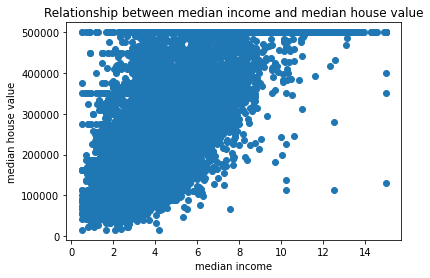

In [18]:
plt.scatter(df['median_income'], df['median_house_value'])
plt.title("Relationship between median income and median house value")
plt.xlabel('median income')
plt.ylabel('median house value')

3. (15 points) Draw a bar figure to show the average "population" for each type of "ocean_proximity" (i.e. for 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND', respectively)

[1230.3174672489083, 1520.2904991243433, 1391.0462524805373, 1354.0086531226486, 668.0]


Text(0, 0.5, 'Population')

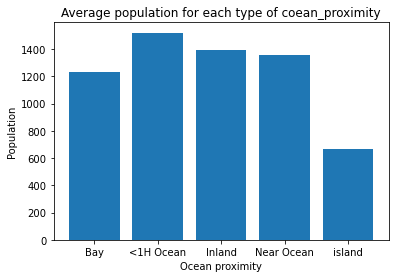

In [46]:
bay = df['population'][df['ocean_proximity'] == 'NEAR BAY'].mean()
ocean = df['population'][df['ocean_proximity'] == '<1H OCEAN'].mean()
inland = df['population'][df['ocean_proximity'] == 'INLAND'].mean()
nearOcean = df['population'][df['ocean_proximity'] == 'NEAR OCEAN'].mean()
island = df['population'][df['ocean_proximity'] == 'ISLAND'].mean()

avg = [bay, ocean, inland, nearOcean, island]

print(avg)
plt.bar(range(len(avg)), avg)
xlabels = ['Bay', '<1H Ocean', 'Inland', 'Near Ocean', 'island']
plt.xticks(range(len(avg)), xlabels)
plt.title("Average population for each type of coean_proximity")
plt.xlabel('Ocean proximity')
plt.ylabel('Population')



4. (15 points) Draw a histogram to show the "median_income" distribution in 5 bins for the "NEAR BAY" houses

Text(0.5, 1.0, 'Median income distribution for near bay houses')

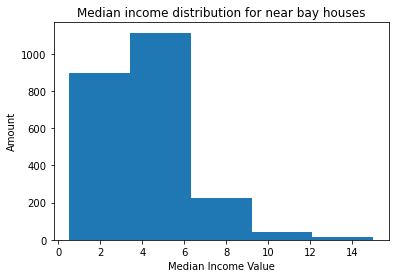

In [59]:
income = df['median_income'][df['ocean_proximity'] == 'NEAR BAY'].values
plt.hist(income, 5)
plt.xlabel('Median Income Value')
plt.ylabel('Amount')
plt.title('Median income distribution for near bay houses')

II. Please use the "breast cancer dataset" included in the scikit-learn library to conduct the following classfication tasks. The code for loading this dataset is given below:

*from sklearn import datasets*

*dataset = datasets.load_breast_cancer()*

*X = dataset['data']*

*y = dataset['target']*


For each task, please copy and paste your source code in the Answer Area after each task. At the same time, please upload your Jupyter Notebook (".ipynb") file with all source code and test results at the last task of this exam.

1. (5 points) Randomly split this dataset into two parts: 60% for training and 40% for testing
2. (20 points) Build a Decision Tree classification model with appropriate parameters (to obtain higher testing accuracy). Show the testing accuracy using ".score()" method
3. (10 points) Show the confusion matrix of the above independent test

[0.92668622 0.96774194 0.97360704 0.98826979 0.9941349  0.99706745
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
1.0
[[ 85   0]
 [  0 143]]


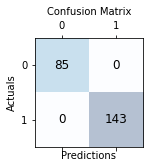

In [78]:
dataset = datasets.load_breast_cancer()
X = dataset['data'] # type: ignore
y = dataset['target'] # type: ignore

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

depth = np.arange(1, 25)
accuracy = np.empty(len(depth))

for i, k in enumerate(depth):
    DT = DecisionTreeClassifier(max_depth=k)
    DT.fit(X_train, y_train)
    accuracy[i] = DT.score(X_train, y_train)
    
print(accuracy)

DT = DecisionTreeClassifier(max_depth = 7, random_state = 0)
DT.fit(X, y)
score = DT.score(X_test, y_test)
print(score)

y_pred = DT.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)


fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

